In [1]:
# Program to calculate binary evolution from constant time lag formalism

import numpy as np
import rebound as rb
import reboundx as rx
import matplotlib.pyplot as plt
from matplotlib.pyplot import cm
from scipy.integrate import odeint
from scipy.integrate import quad
import scipy
from scipy import integrate

In [2]:
def N(e):
    num = 1. + 15./2.*e**2. + 45./8.*e**4. + 5./16.*e**6.
    den = (1.-e**2.)**6.
    return num/den

In [3]:
def Na(e):
    num = 1. + 31./2.*e**2. + 255./8.*e**4. + 185./16.*e**6. + 25./64.*e**8.
    den = (1.-e**2.)**(15./2.)
    return num/den

In [4]:
def Omegae(e):
    num = 1. + 3./2.*e**2. + 1./8.*e**4.
    den = (1.-e**2.)**5.
    return num/den

In [5]:
def Ne(e):
    num = 1. + 15./4.*e**2. + 15./8.*e**4. + 5./64.*e**6.
    den = (1.-e**2.)**(13./2.)
    return num/den

In [6]:
def Omega(e):
    num = 1. + 3.*e**2. + 3./8.*e**4.
    den = (1.-e**2.)**(9./2.)
    return num/den

In [7]:
def Fe(e):
    om_eq = N(e)/Omega(e)  # This is the "pseudo-synchronous" rotation
    return Omegae(e)*om_eq - 18./11.*Ne(e)

In [8]:
def Fa(e):
    om_eq = N(e)/Omega(e)  # This is the "pseudo-synchronous" rotation
    return 4./11.*(N(e)*om_eq - Na(e))

In [ ]:
"""# Ordinary differential equation integrate to get tidal evolution
# Parameters: 
# orb = (a[0],e[0]) initial orbital elements of binary
# time is time array you integrate simulation over
# mu is binary mass ratio M_2/M_1 *not* reduced mass"""

In [26]:
# Loading REBOUND  and REBOUNDx simulation archives
sim = None

sim = rx.SimulationArchive('eb0.525_ap4.500_Np15.0_tup25.0_Q10000.0_tau0.0030.bin', 
                           rebxfilename='xarchive.bin')

orb = []

e = sim[0][0].particles[1].e
a = sim[0][0].particles[1].a
    
orb.append((a,e))

k_2 = sim[0][0].particles[0].params["tctl_k1"] # 0.035 for primary binary
tau = 1E-2
#tau = sim[0][0].particles[0].params["tctl_tau"] # 3.03E-5

M1 = 1
M2 = 1
MU = 0.5
G = 1
#G = 6.67E-11
R_star = 0.1*(1-0.5)**(1/3) # (1-mu)
NB = sim[0][0].particles[1].n
K = ((3/2)*(NB**2)*k_2*tau)*((G*M1**2)/R_star)*((M2/M1)**2)*(R_star/a)**6

In [38]:
nb = np.sqrt(G*(M1+M2)/a**3)
print(nb, NB)

1.4142135623730951 1.4142135623730951


In [28]:
def TideEq(orbit,time,mu=MU,nb=NB, k=K):
    
    ab = orbit[0]
    eb = orbit[1]
        
    dedt = ((11*eb*ab*k)/(G*M1*M2))*(Fe(eb)) # differential equation for eccentricity
    dadt = ((4*k*ab**2)/(G*M1*M2))*(Fa(eb)) # Differential equation for semi-major axis
    
    return [dadt,dedt] # Returns differential equation for a and e

In [39]:
ab_ev = []
eb_ev = []

    # This is where I tidally-circularize the population, you will likely want to do this for only one binary at a time
t_end = t_end = sim[62][0].t
tb = np.linspace(0.,t_end)				# Array of times to calculate ODE over

orbb = (orb[0][0],orb[0][1]) # of the form (ab,eb)			# Initializing orbital elements

solb = odeint(TideEq,orbb,tb, args=(MU,))		# Saving the time evolution of the arrays

ab_ev = solb[:,0]
eb_ev = solb[:,1]

In [40]:
print(eb_ev)

[0.525      0.52482756 0.52465551 0.52448387 0.52431262 0.52414176
 0.5239713  0.52380122 0.52363154 0.52346224 0.52329332 0.52312479
 0.52295663 0.52278885 0.52262145 0.52245442 0.52228777 0.52212148
 0.52195557 0.52179002 0.52162484 0.52146002 0.52129557 0.52113147
 0.52096773 0.52080435 0.52064132 0.52047865 0.52031633 0.52015436
 0.51999274 0.51983146 0.51967053 0.51950995 0.5193497  0.5191898
 0.51903023 0.518871   0.51871211 0.51855355 0.51839533 0.51823743
 0.51807987 0.51792263 0.51776572 0.51760913 0.51745287 0.51729693
 0.51714131 0.51698601]


In [41]:
print(ab_ev)

[1.         0.99990914 0.99981854 0.99972822 0.99963816 0.99954837
 0.99945885 0.99936959 0.9992806  0.99919186 0.99910338 0.99901516
 0.9989272  0.99883949 0.99875204 0.99866483 0.99857788 0.99849118
 0.99840472 0.99831851 0.99823255 0.99814683 0.99806135 0.99797612
 0.99789112 0.99780637 0.99772185 0.99763757 0.99755352 0.99746971
 0.99738613 0.99730278 0.99721966 0.99713677 0.99705411 0.99697167
 0.99688946 0.99680748 0.99672571 0.99664417 0.99656285 0.99648175
 0.99640087 0.99632021 0.99623976 0.99615953 0.99607951 0.9959997
 0.99592011 0.99584073]


In [42]:
np.shape(eb_ev)

(50,)

Text(0.5, 1.0, 'Binary Eccentricity Evolution')

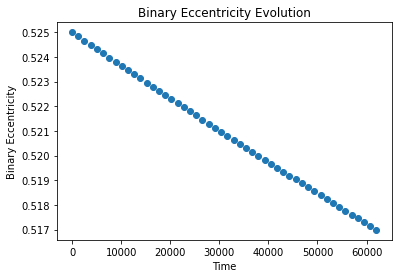

In [43]:
fig = plt.figure()
plt.scatter(tb, eb_ev)
#plt.ylim([0,0.55])
plt.xlabel("Time")
plt.ylabel("Binary Eccentricity")
plt.title("Binary Eccentricity Evolution")

Text(0.5, 1.0, 'Binary Semi-Major Axis Evolution')

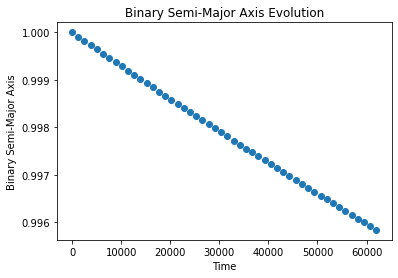

In [44]:
fig = plt.figure()
plt.scatter(tb, ab_ev)
plt.xlabel("Time")
plt.ylabel("Binary Semi-Major Axis")
plt.title("Binary Semi-Major Axis Evolution")